In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('data/cancer.data', header=None, index_col=0)

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df= df.rename(columns={1:'clump_thickness', 2:'uniformity_of_cell_size', 3:'uniformity_of_cell_shape',
                  4:'marginal_adhesion', 5:'single_epithelial_cell_size',6:'bare_nuclei',
                   7:'bland_chromatin', 8: 'normal_nucleoli', 9:'mitoses',
                   10:'class'})
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


## column 6- bare nuclei
column 6 is of an object type instead of an integer. It is worth looking into why it is so.

In [7]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
df['bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [9]:
most_common=df['bare_nuclei'].value_counts().index[0]
df['bare_nuclei']= df['bare_nuclei'].replace('?', most_common).astype('int64')

df['bare_nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

successfully replace the '?' with the most occuring value in the column

In [10]:
df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
X= df.drop('class', axis=1)
y=df['class']

In [12]:
X.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


## distribution of our target

In [13]:
y.value_counts()

2    458
4    241
Name: class, dtype: int64

In [14]:
digit_to_binary={
    2:0,
    4:1
}

y= y.map(digit_to_binary)


### split the data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

## base model

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

/home/masai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_preds= log_reg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

confusion_matrix(y_preds, y_test)

array([[141,   5],
       [  2,  62]])

In [19]:
accuracy_score(y_test, y_preds)

0.9666666666666667

In [20]:
f1_score( y_preds, y_test)

0.9465648854961832

In [21]:
recall_score( y_preds, y_test)

0.96875

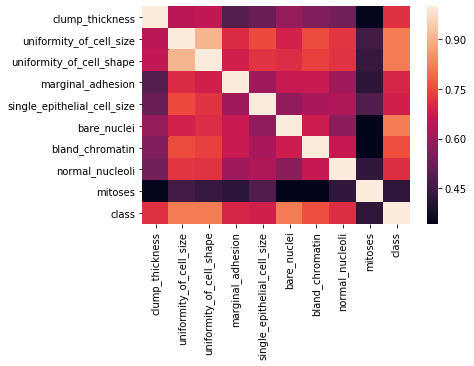

In [22]:
sns.heatmap(df.corr())

In [23]:
df.corr()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


# statsmodels

In [24]:
import statsmodels.api as sm
stats_log_reg= sm.Logit(y_train, X_train)
result= stats_log_reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.374565
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            8
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.4246
Time:                        13:10:07   Log-Likelihood:                -183.16
converged:                       True   LL-Null:                       -318.33
Covariance Type:            nonrobust   LLR p-value:                 8.354e-54
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clump_thickness                -0.3973      0.070     -5.649      0.000      -0.535      -0.259
uniformity_of_cell_size         0.8419      0.159      5.288      0.000       0.530       1.154
uniformity_of_cell_shape        0.2573      0.141      1.819      0.069      -0.020       0.534
marginal_adhesion              -0.0124      0.087     -0.142      0.887      -0.183       0.159
single_epithelial_cell_size    -0.7663      0.119     -6.446      0.000      -0.999      -0.533
bare_nuclei                     0.6347      0.078      8.132      0.000       0.482       0.788
bland_chromatin                -0.4445      0.106     -4.186      0.000      -0.653      -0.236
normal_nucleoli                 0.3427      0.089      3.829      0.000       0.167       0.518
mitoses                        -0.2529      0.107     -2.372      0.018      -0.462      -0.044
===============================================================================================
"""

2 of our features have a P-value greater than 0.05 namely;
* uniformity_of_cell_shape
* marginal_adhesion

I'll now remove them.

In [25]:
to_drop=['uniformity_of_cell_shape', 'marginal_adhesion']
X_train_new= X_train.drop(to_drop, axis=1)
X_test_new= X_test.drop(to_drop, axis=1)

X_train_new.columns

Index(['clump_thickness', 'uniformity_of_cell_size',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses'],
      dtype='object')

In [26]:
stats_log_reg= sm.Logit(y_train, X_train_new)
result2= stats_log_reg.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.378184
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  489
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.4191
Time:                        13:10:07   Log-Likelihood:                -184.93
converged:                       True   LL-Null:                       -318.33
Covariance Type:            nonrobust   LLR p-value:                 1.052e-54
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
clump_thickness                -0.3659      0.067     -5.488      0.000      -0.497      -0.235
uniformity_of_cell_size         1.0077      0.127      7.957      0.000       0.760       1.256
single_epithelial_cell_size    -0.7559      0.116     -6.495      0.000      -0.984      -0.528
bare_nuclei                     0.6487      0.077      8.439      0.000       0.498       0.799
bland_chromatin                -0.4458      0.104     -4.306      0.000      -0.649      -0.243
normal_nucleoli                 0.3560      0.087      4.092      0.000       0.186       0.527
mitoses                        -0.2427      0.103     -2.357      0.018      -0.444      -0.041
===============================================================================================
"""

In [27]:
log_reg2= LogisticRegression()
log_reg2.fit(X_train_new, y_train)

/home/masai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_preds2= log_reg2.predict(X_test_new)

In [30]:
confusion_matrix(y_preds2, y_test)

array([[140,   5],
       [  3,  62]])

In [31]:
f1_score( y_preds, y_test)

0.9465648854961832